In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf

In [3]:
ETH_ticker=yf.Ticker("ETH-USD")

In [4]:
ETH=ETH_ticker.history(period="max")
ETH

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,3174.051025,3285.760986,3172.777100,3275.951416,15993893521,0.0,0.0
2024-07-27 00:00:00+00:00,3275.891602,3327.426514,3195.356689,3247.607910,15198233287,0.0,0.0
2024-07-28 00:00:00+00:00,3247.507324,3283.152100,3201.763184,3271.464600,8959236446,0.0,0.0


In [5]:
ETH_reset = ETH.reset_index()
ETH_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          2456 non-null   datetime64[ns, UTC]
 1   Open          2456 non-null   float64            
 2   High          2456 non-null   float64            
 3   Low           2456 non-null   float64            
 4   Close         2456 non-null   float64            
 5   Volume        2456 non-null   int64              
 6   Dividends     2456 non-null   float64            
 7   Stock Splits  2456 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 153.6 KB


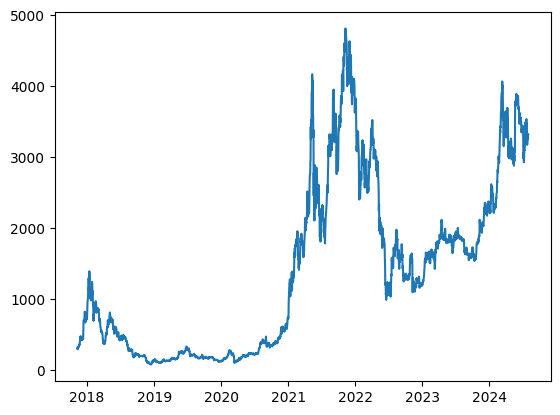

In [6]:
plt.plot(ETH_reset['Date'],ETH_reset['Close'])
plt.show()

In [7]:
ETH_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
ETH_reset['ds'] = ETH_reset['ds'].dt.tz_localize(None)
ETH_final=ETH_reset[['ds','y']]
ETH_final.head()

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003


In [8]:
ETH_train = ETH_reset.iloc[:len(ETH_reset)-365]
ETH_test = ETH_reset.iloc[len(ETH_reset)-365:]

In [9]:
model_p= Prophet()
# model_p.add_regressor('Volume')
model_p.fit(ETH_train)

13:57:55 - cmdstanpy - INFO - Chain [1] start processing
13:57:58 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model_p.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = model_p.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,815.547761,424.948979,1071.875264,815.547761,815.547761,-79.360744,-79.360744,-79.360744,-2.019522,-2.019522,-2.019522,-77.341222,-77.341222,-77.341222,0.0,0.0,0.0,736.187017
1,2017-11-10,814.052664,383.301966,1038.555976,814.052664,814.052664,-93.298446,-93.298446,-93.298446,-4.399754,-4.399754,-4.399754,-88.898692,-88.898692,-88.898692,0.0,0.0,0.0,720.754218
2,2017-11-11,812.557567,371.161488,1015.444976,812.557567,812.557567,-101.161127,-101.161127,-101.161127,-0.941508,-0.941508,-0.941508,-100.219619,-100.219619,-100.219619,0.0,0.0,0.0,711.396440
3,2017-11-12,811.062469,376.615427,1033.436851,811.062469,811.062469,-109.816523,-109.816523,-109.816523,1.294956,1.294956,1.294956,-111.111478,-111.111478,-111.111478,0.0,0.0,0.0,701.245947
4,2017-11-13,809.567372,373.167310,999.849468,809.567372,809.567372,-121.015415,-121.015415,-121.015415,0.383151,0.383151,0.383151,-121.398566,-121.398566,-121.398566,0.0,0.0,0.0,688.551958


In [11]:
plot_plotly(model_p ,forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2023, 7, 29, 0, 0),
                          datetime.datetime(2023, 7, 30, 0, 0),
                          datetime.datetime(2023, 7, 31, 0, 0)], dtype=object),
              'y': array([ 320.88400269,  299.25299072,  314.68099976, ..., 1881.06884766,
                          1861.64379883, 1856.16235352])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([424.94897893, 383.30196643, 371.16148782, ..., 311.05560406,
                          279.07667461, 417.6431243 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([ 736.18701673,  720.75421789,  711.39643963, ..., 1707.44446117,
                          1712.86876102, 1720.46463927])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([1071.87526364, 1038.55597563, 1015.44497592, ..., 3155.63647291,
                          3136.03305072, 3114.64565665])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {

In [12]:
plot_components_plotly(model_p, forecast)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 815.54776086,  814.05266373,  812.55756659, ..., 1765.16436865,
                          1765.39990237, 1765.63543608]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 815.54776086,  814.05266373,  812.55756659, ..., 3105.41351701,
                          3112.05487368, 3118.69623036]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([815.54776086, 814.05266373, 812.55756659, ..., 390.63900049,
                          386.90066891, 383.21073681]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([-64.74724991, -57.10060109, -49.77530355, ..., -88.18270283,
                          -80.4316182 , -72.5724982 ]),
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0),
                          datetime.datetime(2017, 1, 4, 0, 0),
                          datetime.datetime(2017, 1, 5, 0, 0),
                          datetime.datetime(2017, 1, 6, 0, 0),
                          datetime.datetime(2017, 1, 7, 0, 0)], dtype=object),
              'xaxis': 'x3',
              'y': array([ 1.29495578,  0.38315132,  1.54752323,  4.13515331, -2.01952192,
                          -4.

In [13]:
from statsmodels.tools.eval_measures import rmse

In [14]:
predictions = forecast.iloc[-365:]['yhat']

In [15]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,ETH_test['y']))
print("Mean Value of Test Dataset:", ETH_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  1126.2779228107102
Mean Value of Test Dataset: 2617.062762869221


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(ETH_test.y, predictions)
print("R-squared:", r2)

R-squared: -1.1994907058182163
